In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [302]:
train_df.shape

(9324, 6)

In [303]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9324 non-null   object 
 1   source        9324 non-null   object 
 2   sentence_1    9324 non-null   object 
 3   sentence_2    9324 non-null   object 
 4   label         9324 non-null   float64
 5   binary-label  9324 non-null   float64
dtypes: float64(2), object(4)
memory usage: 437.2+ KB


In [304]:
train_df.isnull().sum()

id              0
source          0
sentence_1      0
sentence_2      0
label           0
binary-label    0
dtype: int64

In [305]:
train_df.describe()

,label,binary-label
count,9324.000000,9324.000000
mean,1.849968,0.389532
std,1.602212,0.487670
min,0.000000,0.000000
25%,0.200000,0.000000
50%,1.600000,0.000000
75%,3.400000,1.000000
max,5.000000,1.000000


C:\Users\user\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


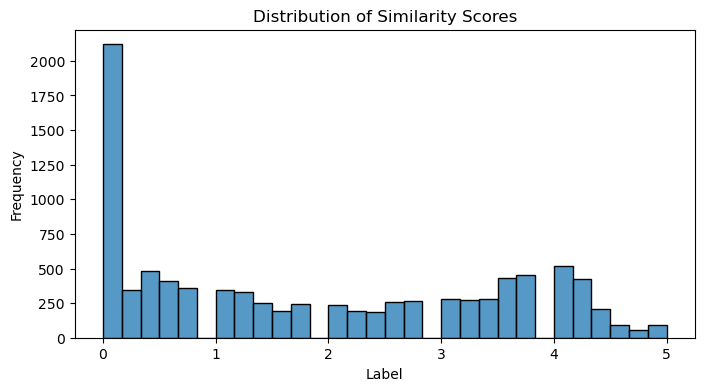

In [306]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df['label'], bins=30)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

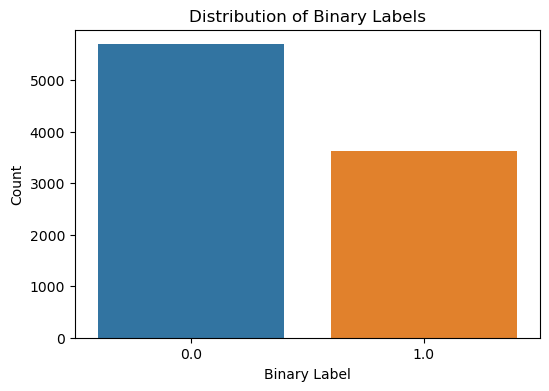

In [307]:
plt.figure(figsize=(6, 4))
sns.countplot(x='binary-label', data=train_df)
plt.title('Distribution of Binary Labels')
plt.xlabel('Binary Label')
plt.ylabel('Count')
plt.show()

In [308]:
train_df[train_df.duplicated("sentence_1", keep = False)]

,id,source,sentence_1,sentence_2,label,binary-label


In [309]:
train_df[train_df.duplicated("sentence_2", keep = False)]

,id,source,sentence_1,sentence_2,label,binary-label
173,boostcamp-sts-v1-train-173,slack-rtt,다음에 다시 재밌는 이야기해요!,다음에 또 즐겁게 이야기합시다!,3.6,1.0
601,boostcamp-sts-v1-train-601,slack-rtt,다음에 또 뵈어요!,다음에 만나요!,4.0,1.0
4523,boostcamp-sts-v1-train-4523,petition-rtt,청소년보호법 폐지요,청소년보호법 폐지해주세요,4.0,1.0
4706,boostcamp-sts-v1-train-4706,petition-rtt,청소년 보호법 폐지 부탁드립니다,청소년보호법 폐지해주세요,4.2,1.0
6540,boostcamp-sts-v1-train-6540,slack-rtt,다음에 또 즐겁게 이야기 나누어요!,다음에 또 즐겁게 이야기합시다!,4.4,1.0
8520,boostcamp-sts-v1-train-8520,slack-rtt,다음에 꼭 뵈어요!,다음에 만나요!,3.4,1.0


In [310]:
train_df[train_df.duplicated(["sentence_1", "sentence_2"], keep = False)]

,id,source,sentence_1,sentence_2,label,binary-label


In [314]:
train_df["source"].unique()

array(['nsmc-sampled', 'slack-rtt', 'petition-sampled', 'slack-sampled',
       'nsmc-rtt', 'petition-rtt'], dtype=object)

In [315]:
nsmc_sampled_df = train_df[train_df["source"] == "nsmc-sampled"]
nsmc_sampled_df.head()

,id,source,sentence_1,sentence_2,label,binary-label,abs_len_diff,len_diff
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,18,18
7,boostcamp-sts-v1-train-007,nsmc-sampled,이렇게 귀여운 쥐들은 처음이네요.ㅎㅎㅎ,이렇게 지겨운 공포영화는 처음..,0.6,0.0,3,3
11,boostcamp-sts-v1-train-011,nsmc-sampled,극의전개가너무느릿하여답답합니다,전개가 너무 느려서 속터진다,3.8,1.0,1,1
13,boostcamp-sts-v1-train-013,nsmc-sampled,글쎄.. 특색도 없고 별로였던 걸로 기억하는데..,큰 반전 없던걸로 기억하는데...,1.8,0.0,9,9
23,boostcamp-sts-v1-train-023,nsmc-sampled,노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..,조금유치하지만 가볍게 볼수는 있는영화네요!,0.0,0.0,13,13


In [316]:
slack_rtt_df = train_df[train_df["source"] == "slack-rtt"]
slack_rtt_df.head()

,id,source,sentence_1,sentence_2,label,binary-label,abs_len_diff,len_diff
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,1,1
6,boostcamp-sts-v1-train-006,slack-rtt,전 암만 찍어도 까만 하늘.. ㅠㅠ,암만 찍어도 하늘은 까맣다.. ㅠㅠ,3.6,1.0,0,0
10,boostcamp-sts-v1-train-010,slack-rtt,그 책부터 언능 꺼내봐야 겠어요!,책에서 꺼내야겠어요!,2.4,0.0,7,7
27,boostcamp-sts-v1-train-027,slack-rtt,"마지막으로 리모트 근무의 장점에 대해 이야기했는데, 시간을 효율적으로 사용할 수 있...","마지막으로 재택근무의 장점에 대해 이야기를 나누었고, 시간을 효율적으로 사용할 수 ...",4.2,1.0,6,6
28,boostcamp-sts-v1-train-028,slack-rtt,겨울산이 예쁘지만 산을 잘 못타서 대리만족 중입니당,겨울산은 예쁜데 제가 등산을 잘 못해서 대만족입니다.,3.2,1.0,1,-1


In [317]:
petition_sampled_df = train_df[train_df["source"] == "petition-sampled"]
petition_sampled_df.head()

,id,source,sentence_1,sentence_2,label,binary-label,abs_len_diff,len_diff
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,4,-4
8,boostcamp-sts-v1-train-008,petition-sampled,미세먼지 해결이 가장 시급한 문제입니다!,가장 시급한 것이 신생아실 관리입니다!!!,0.4,0.0,1,-1
9,boostcamp-sts-v1-train-009,petition-sampled,크림하우스 환불조치해주세요.,크림하우스 환불조치할 수 있도록해주세여,4.2,1.0,6,-6
15,boostcamp-sts-v1-train-015,petition-sampled,LG전자 스마트폰 생산 중단 청원,LG전자서비스의 노조 와해를 조사해주세요.,0.4,0.0,5,-5
19,boostcamp-sts-v1-train-019,petition-sampled,내년 러시아월드컵 자진포기 청원드립니다.,2023 아시안컵 유치에 공동개최를 반대 합니다.,0.0,0.0,5,-5


In [318]:
slack_sampled_df = train_df[train_df["source"] == "slack-sampled"]
slack_sampled_df.head()

,id,source,sentence_1,sentence_2,label,binary-label,abs_len_diff,len_diff
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,6,-6
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,11,-11
14,boostcamp-sts-v1-train-014,slack-sampled,아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.,여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.,0.0,0.0,1,-1
16,boostcamp-sts-v1-train-016,slack-sampled,환갑이면? ㅎㅎㅎ 이런 재미난 얘기하느라 시간이 금방 가더라고요.,넘넘 즐거운 이야기를 하고나니 시간이 금방 가버렸네요.,3.0,1.0,6,6
20,boostcamp-sts-v1-train-020,slack-sampled,앞머리 새로 하셨습니다. ^^,가방에 넣어 다니면서 조금씩 먹습니다. ^^,0.0,0.0,8,-8


In [319]:
nsmc_rtt_df = train_df[train_df["source"] == "nsmc-rtt"]
nsmc_rtt_df.head()

,id,source,sentence_1,sentence_2,label,binary-label,abs_len_diff,len_diff
5,boostcamp-sts-v1-train-005,nsmc-rtt,오마이가뜨지져스크롸이스트휏,오 마이 갓 지저스 스크론 이스트 팬,2.6,1.0,6,-6
12,boostcamp-sts-v1-train-012,nsmc-rtt,오랫만에 존쿠삭의 연기보니 좋네요 Good~~!!,오랜만에 존 쿠삭의 연기를 보니 반갑다. 좋아요~~!!,3.8,1.0,3,-3
24,boostcamp-sts-v1-train-024,nsmc-rtt,군대가기전에 봤었는데 진짜 윈터스같은 사람이 상관이면 목숨걸고 싸워도 후회는 없지 ...,입대하기 전에 봤는데 윈터스 같은 사람이 진심으로 아껴준다면 목숨을 걸고 싸워도 후...,4.2,1.0,2,-2
29,boostcamp-sts-v1-train-029,nsmc-rtt,한사람의 파멸을 적나라하게 드러내 준 영화,한 사람의 파멸을 드러내는 영화,3.6,1.0,6,6
34,boostcamp-sts-v1-train-034,nsmc-rtt,전설따라 삼천리(삼만리인가?)에 의하면 이 영화가 꽤 괜찮다고 할뿐 아니라 내가 좋...,전설에 따르면 삼천리(삼천리?)에 따르면 이 영화는 꽤 괜찮을 뿐만 아니라 내가 제...,4.0,1.0,1,-1


In [320]:
petition_rtt_df = train_df[train_df["source"] == "petition-rtt"]
petition_rtt_df.head()

,id,source,sentence_1,sentence_2,label,binary-label,abs_len_diff,len_diff
17,boostcamp-sts-v1-train-017,petition-rtt,최종구 금융위원장을 파면하라!,최종구 금융위원장 해고!,3.8,1.0,3,3
18,boostcamp-sts-v1-train-018,petition-rtt,정말 간절히 정부의 도움이 필요합니다.,정부의 도움이 절실히 필요합니다.,4.0,1.0,3,3
21,boostcamp-sts-v1-train-021,petition-rtt,김기덕 조재현 성폭행 철저히 수사해주세요!,김기덕·조재현 성폭행 의혹 철저히 수사하라!,4.2,1.0,1,-1
25,boostcamp-sts-v1-train-025,petition-rtt,국민청원에 올린글 삭제하는 청와대뉴미디어정책실은 억울한 피해자를 죽이고 경찰에게 증...,"국민청원 글을 삭제하는 청와대 뉴미디어정책실은 부당한 피해자를 살해하고, 경찰에 증...",4.0,1.0,6,-6
30,boostcamp-sts-v1-train-030,petition-rtt,금융워원회의 공모주 개인 배정 축소(폐지)를 막아주세요,금융감독원의 공모주 개인배분 축소(폐지)를 막아주세요.,4.4,1.0,0,0


In [321]:
train_df['source'].value_counts()

source
petition-sampled    2352
nsmc-sampled        2296
slack-sampled       2024
slack-rtt           1047
petition-rtt         817
nsmc-rtt             788
Name: count, dtype: int64

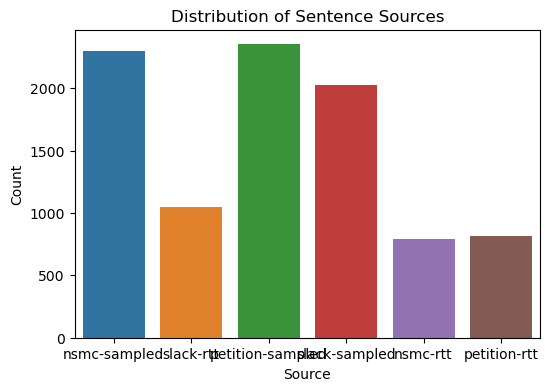

In [322]:
plt.figure(figsize=(6, 4))
sns.countplot(x='source', data=train_df)
plt.title('Distribution of Sentence Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

C:\Users\user\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


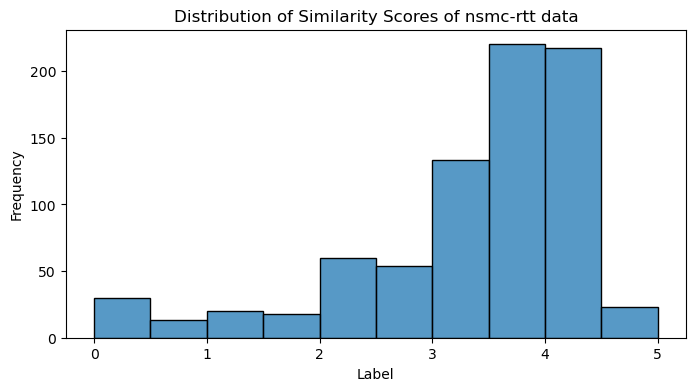

In [323]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df[train_df["source"]=="nsmc-rtt"]["label"], bins=10)
plt.title('Distribution of Similarity Scores of nsmc-rtt data')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

C:\Users\user\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


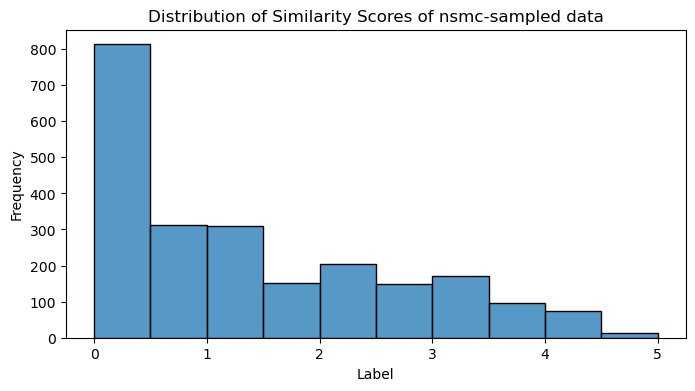

In [324]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df[train_df["source"]=="nsmc-sampled"]["label"], bins=10)
plt.title('Distribution of Similarity Scores of nsmc-sampled data')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

C:\Users\user\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


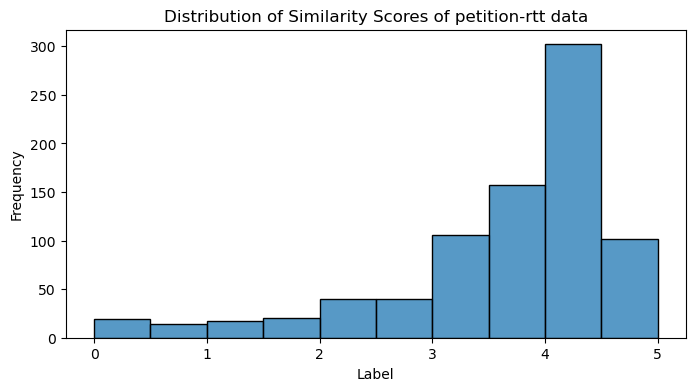

In [325]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df[train_df["source"]=="petition-rtt"]["label"], bins=10)
plt.title('Distribution of Similarity Scores of petition-rtt data')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

C:\Users\user\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


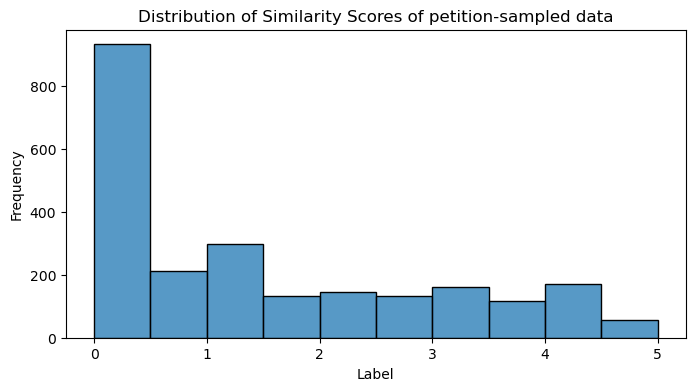

In [326]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df[train_df["source"]=="petition-sampled"]["label"], bins=10)
plt.title('Distribution of Similarity Scores of petition-sampled data')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

C:\Users\user\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


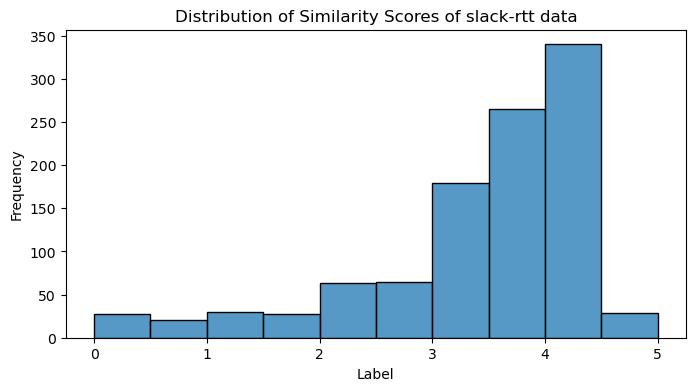

In [327]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df[train_df["source"]=="slack-rtt"]["label"], bins=10)
plt.title('Distribution of Similarity Scores of slack-rtt data')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

C:\Users\user\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


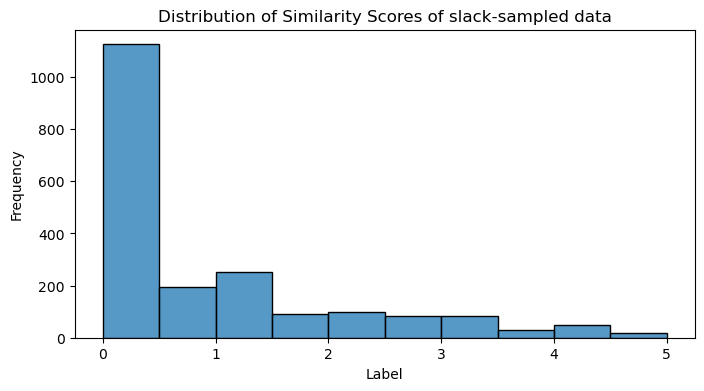

In [328]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df[train_df["source"]=="slack-sampled"]["label"], bins=10)
plt.title('Distribution of Similarity Scores of slack-sampled data')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

In [329]:
dev_df = pd.read_csv("dev.csv")
dev_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,1.0
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,1.0
4,boostcamp-sts-v1-dev-004,slack-sampled,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~,1.4,0.0


In [330]:
dev_df.shape

(550, 6)

In [331]:
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            550 non-null    object 
 1   source        550 non-null    object 
 2   sentence_1    550 non-null    object 
 3   sentence_2    550 non-null    object 
 4   label         550 non-null    float64
 5   binary-label  550 non-null    float64
dtypes: float64(2), object(4)
memory usage: 25.9+ KB


In [332]:
dev_df.isnull().sum()

id              0
source          0
sentence_1      0
sentence_2      0
label           0
binary-label    0
dtype: int64

In [333]:
dev_df.describe()

,label,binary-label
count,550.000000,550.000000
mean,2.584000,0.520000
std,1.459483,0.500055
min,0.000000,0.000000
25%,1.400000,0.000000
50%,2.600000,1.000000
75%,3.800000,1.000000
max,5.000000,1.000000


C:\Users\user\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


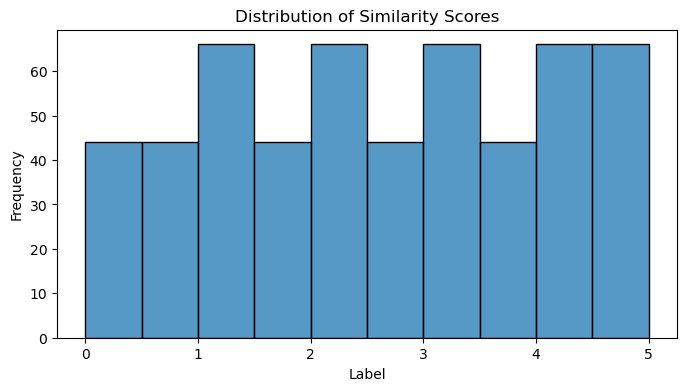

In [334]:
plt.figure(figsize=(8, 4))
sns.histplot(dev_df['label'], bins=10)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

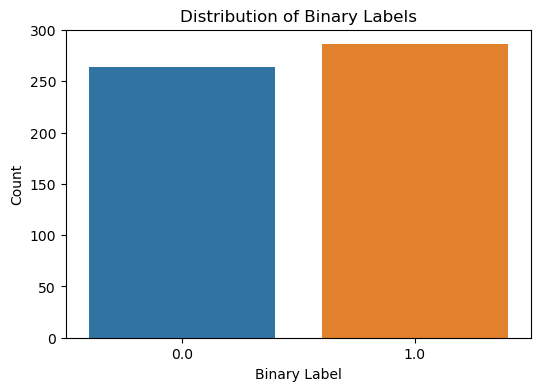

In [335]:
plt.figure(figsize=(6, 4))
sns.countplot(x='binary-label', data=dev_df)
plt.title('Distribution of Binary Labels')
plt.xlabel('Binary Label')
plt.ylabel('Count')
plt.show()

In [336]:
dev_df['source'].value_counts()

source
nsmc-sampled        127
petition-sampled    127
slack-sampled        99
slack-rtt            84
petition-rtt         65
nsmc-rtt             48
Name: count, dtype: int64

In [337]:
dev_df[dev_df.duplicated(["sentence_1", "sentence_2"], keep = False)]

,id,source,sentence_1,sentence_2,label,binary-label


In [338]:
train_dev_df = pd.concat([train_df, dev_df], ignore_index=True)
train_dev_df.head()

,id,source,sentence_1,sentence_2,label,binary-label,abs_len_diff,len_diff
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,18.0,18.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,1.0,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,4.0,-4.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,6.0,-6.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,11.0,-11.0


C:\Users\user\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


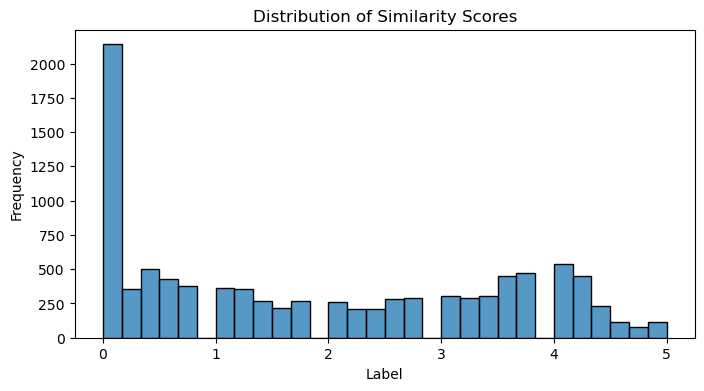

In [339]:
plt.figure(figsize=(8, 4))
sns.histplot(train_dev_df['label'], bins=30)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

In [340]:
train_dev_df[train_dev_df.duplicated(["sentence_1", "sentence_2"], keep = False)]

,id,source,sentence_1,sentence_2,label,binary-label,abs_len_diff,len_diff


In [341]:
train_dev_df[(train_dev_df['label'] >= 0.0) & (train_dev_df['label'] < 0.5)].shape[0]

2990

In [342]:
train_dev_df[(train_dev_df['label'] >= 0.5) & (train_dev_df['label'] < 1.0)].shape[0]

809

In [343]:
train_dev_df[(train_dev_df['label'] >= 1.0) & (train_dev_df['label'] < 1.5)].shape[0]

994

In [344]:
train_dev_df[(train_dev_df['label'] >= 1.5) & (train_dev_df['label'] < 2.0)].shape[0]

484

In [345]:
train_dev_df[(train_dev_df['label'] >= 2.0) & (train_dev_df['label'] < 2.5)].shape[0]

679

In [346]:
train_dev_df[(train_dev_df['label'] >= 2.5) & (train_dev_df['label'] < 3.0)].shape[0]

568

In [347]:
train_dev_df[(train_dev_df['label'] >= 3.0) & (train_dev_df['label'] < 3.5)].shape[0]

898

In [348]:
train_dev_df[(train_dev_df['label'] >= 3.5) & (train_dev_df['label'] < 4.0)].shape[0]

927

In [349]:
train_dev_df[(train_dev_df['label'] >= 4.0) & (train_dev_df['label'] < 4.5)].shape[0]

1217

In [350]:
train_dev_df[(train_dev_df['label'] >= 4.5)].shape[0]

308

In [351]:
train_dev_df[(train_dev_df['label'] == 0)].shape[0]

2140

In [352]:
train_dev_df[(train_dev_df['label'] == 1)].shape[0]

364

In [353]:
train_dev_df[(train_dev_df['label'] == 2)].shape[0]

258

In [354]:
train_dev_df[(train_dev_df['label'] == 3)].shape[0]

305

In [355]:
train_dev_df[(train_dev_df['label'] == 4)].shape[0]

538

In [356]:
train_dev_df[(train_dev_df['label'] == 5)].shape[0]

113

In [6]:
label5_df = train_df[train_df["label"] == 5.0]

In [7]:
label5_df.to_csv("label5.csv", index=False)